In [16]:
from post_process import load
from file_paths import *
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
wt = load(path_dir_s1 + 'wt_numer.pkl')
rbt = load(path_dir_s1 + 'rbt_numer.pkl')

In [3]:
wt_b = np.array(wt)[[5,6,7]]
rbt_b = np.array(rbt)[[5,6,7]]

In [4]:
rbt_imp = np.percentile(rbt_b, 97, axis=-1)
(rbt_imp - rbt_imp[0])/rbt_imp[0]

array([ 0.        , -0.03390412, -0.19028045])

In [5]:
# for the weight analysis
w3 = load(path_p_ddqn_ha3)
w5 = load(path_p_ddqn_ha5)
w7 = load(path_p_ddqn_ha7)
w9 = load(path_p_ddqn_ha9)
w11 = load(path_p_ddqn_ha11)
rbt_w = load('out/compare/weights/rbt_numer.pkl')
wt_w = load('out/compare/weights/wt_numer.pkl')

In [6]:
np.percentile(wt_w, 75, axis=-1)

array([3.10988768, 2.87529402, 2.8610118 , 2.78767852, 2.90632763])

In [7]:
np.percentile(rbt_w, 75, axis=-1)

array([2.19492991, 2.01148135, 2.0165655 , 2.00479464, 2.13284607])

In [8]:
# for hypothesis testing on wait time groups
nc = load(path_p_nc_b)
eh = load(path_p_eh_b)
ddqnla = load(path_p_ddqn_la_b)
ddqnha = load(path_p_ddqn_ha_b)

In [9]:
all_pax = []

for scenario, name_scen in zip([nc, eh, ddqnla, ddqnha], ['nc', 'eh', 'ddqnla', 'ddqnha']):
    for replication in scenario:
        all_pax += [[p.orig_idx, p.wait_time, name_scen] for p in replication]

In [10]:
wt_by_scen = pd.DataFrame(all_pax, columns=['orig_idx', 'wait_time', 'scenario'])

In [11]:
wt_by_scen.groupby('scenario')['wait_time'].apply(lambda x: (x>=5*60).sum()/(x>=0).sum()).reset_index()

,scenario,wait_time
0,ddqnha,0.139153
1,ddqnla,0.150323
2,eh,0.150652
3,nc,0.198018


In [29]:
wt_by_scen_peak = wt_by_scen[wt_by_scen['orig_idx']==48].copy()

In [30]:
wt_by_scen_peak.groupby('scenario')['wait_time'].apply(lambda x: (x>=5*60).sum()/(x>=0).sum()).reset_index()

,scenario,wait_time
0,ddqnha,0.128137
1,ddqnla,0.191367
2,eh,0.187316
3,nc,0.301136


In [58]:
wt_by_scen_peak.groupby('scenario')['wait_time'].mean()

scenario
ddqnha    158.223020
ddqnla    181.697009
eh        164.995069
nc        224.681316
Name: wait_time, dtype: float64

array([[<AxesSubplot:title={'center':'wait_time'}>]], dtype=object)

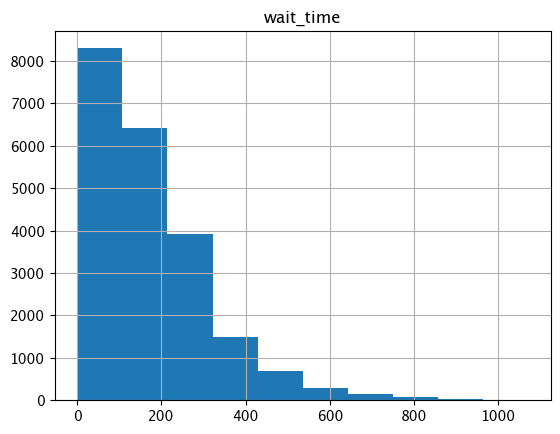

In [16]:
wt_by_scen[wt_by_scen['scenario']=='ddqnla'].hist('wait_time')

Text(0.5, 0, 'wait time (seconds)')

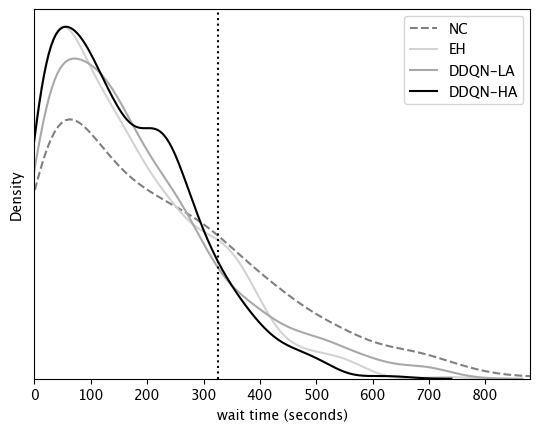

In [57]:
fig, ax = plt.subplots()
styles1 = ['bs-','ro-','y^-', 'po-']
scenarios = ['nc', 'eh', 'ddqnla', 'ddqnha']
scenario_lbls = ['NC', 'EH', 'DDQN-LA', 'DDQN-HA']

linestyles = ['dashed', 'solid', 'solid', 'solid']
colors = ['gray', 'lightgray', 'darkgray', 'black']
for i in range(len(linestyles)):
    sns.kdeplot(
        data=wt_by_scen_peak[wt_by_scen_peak['scenario']==scenarios[i]], x='wait_time', ax=ax, linestyle=linestyles[i], color=colors[i], label=scenario_lbls[i])
plt.legend()
plt.axvline(wt_by_scen_peak.loc[wt_by_scen_peak['scenario']=='ddqnha','wait_time'].quantile(0.9), color='black', linestyle='dotted')
plt.xlim(0,880)
ax.set_yticks([])
ax.set_ylabel('Density')
ax.set_xlabel('wait time (seconds)')